Start by importing our dependencies. 

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


Next we'll define our base model before adding the social distancing effect.

In [3]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]

    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
    global E_J
    global I_J
    E_J = np.array(E)
    I_J = np.array(I)
    return np.stack([S, E, I, R]).T

Now we'll run our model with initial params

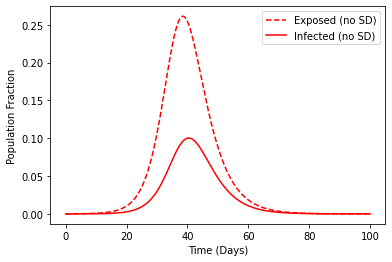

In [5]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)
plt.plot(t, E_J, 'r--', label = "Exposed (no SD)")
plt.plot(t, I_J, 'r-', label = "Infected (no SD)")
plt.xlabel('Time (Days)')
plt.ylabel('Population Fraction')
plt.legend()

The above graph shows the exposed and infected numbers. Now lets create a model that shows the effect of social distancing:

In [6]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
    global ES_J
    global IS_J
    ES_J = np.array(E)
    IS_J = np.array(I)
    return np.stack([S, E, I, R]).T

Note that we have added an additional param 'rho' which affects the rate which the virus spreads.

Now we define new parameters and plot the effect of social distancing alongside our initial results:


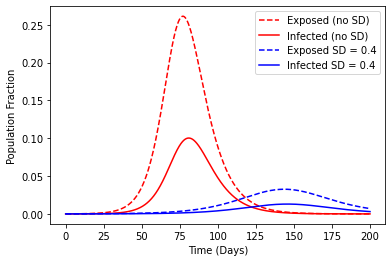

In [7]:
# Define parameters
t_max = 200
dt = .2
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5


rho = 0.4


params = alpha, beta, gamma, rho
# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)



plt.plot(t, E_J, 'r--', label = "Exposed (no SD)")
plt.plot(t, I_J, 'r-', label = "Infected (no SD)")
plt.plot(t, ES_J, 'b--', label = "Exposed SD = " + str(rho))
plt.plot(t, IS_J, 'b-', label = "Infected SD = " + str(rho))
plt.xlabel('Time (Days)')
plt.ylabel('Population Fraction')
plt.legend()

In [ ]:
The effect is dramatic. 